### Metrics

In [1]:
from scipy.stats import pearsonr

def calculate_R(res):
    print('----------Pearson R----------')
    baselines = ['loo', 'loss_sv', 'ig_sv', 'spgp_ig_sv']
    for baseline in baselines:
        curr_val = np.array(res[baseline])
        if np.isnan(curr_val[0]):
            print('Warning:', baseline, 'contains nan values')
            continue
        r = pearsonr(res['vol_sv_robust'], curr_val)
        print(baseline, ": ", r)

def calculate_relative(res):
    print('----------Relative Value----------')
    baselines = ['loo', 'loss_sv', 'ig_sv', 'spgp_ig_sv', 'vol', 'vol_sv', 'vol_sv_robust']
    data = {}
    for baseline in baselines:
        if baseline in res.keys():
            curr_val = np.array(res[baseline])
            if np.isnan(curr_val[0]):
                print('Warning:', baseline, 'contains nan values')
                continue
            if np.sum(curr_val<0) > 0:
                print('Warning: negative values in {} metric replaced by zero'.format(baseline))
    #             curr_val[curr_val < 0] = 0
                curr_val -= np.min(curr_val)
            val = curr_val/np.sum(curr_val)
            data[baseline] = val
            print(baseline, ": ", val)
    return data

def compare(res, save_path):
    calculate_R(res)
    data = calculate_relative(res)
    fig, ax = plt.subplots(figsize=(4.5,3.5))
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    
def bar_plot_diff(data1, data2):
    fig, ax = plt.subplots()
    bar_plot(ax, data1, data2=data2, total_width=.8, single_width=.9)
    plt.show()

### Synthetic Data on Baseline Distributions (Fig. 2)


----------Relative Value----------
loo :  [0.         0.43068674 0.56931326]
loss_sv :  [0.33093961 0.33473613 0.33432426]
ig_sv :  [0.3274436  0.33613265 0.33642375]
vol_sv :  [0.32487544 0.3347752  0.34034938]
vol_sv_robust :  [0.32487547 0.33477518 0.3403493 ]
----------Relative Value----------
loo :  [0.        0.1203363 0.8796637]
loss_sv :  [0.31456125 0.33975756 0.34568119]
ig_sv :  [0.07371785 0.19020875 0.7360734 ]
vol_sv :  [0.08480285 0.21063861 0.70455855]
vol_sv_robust :  [0.0848033  0.21063949 0.7045572 ]
----------Relative Value----------
loo :  [0.39877151 0.222784   0.37844449]
loss_sv :  [0.45389531 0.09163227 0.45447242]
ig_sv :  [0.3278548  0.32931617 0.34282902]
vol_sv :  [0.34825826 0.28773937 0.3640024 ]
vol_sv_robust :  [0.34825808 0.28773975 0.36400214]
----------Relative Value----------
loo :  [0.         0.16483988 0.83516012]
loss_sv :  [0.33102262 0.33372817 0.33524921]
ig_sv :  [0.14150795 0.30859664 0.54989535]
vol_sv :  [0.18078934 0.34192112 0.47728956]

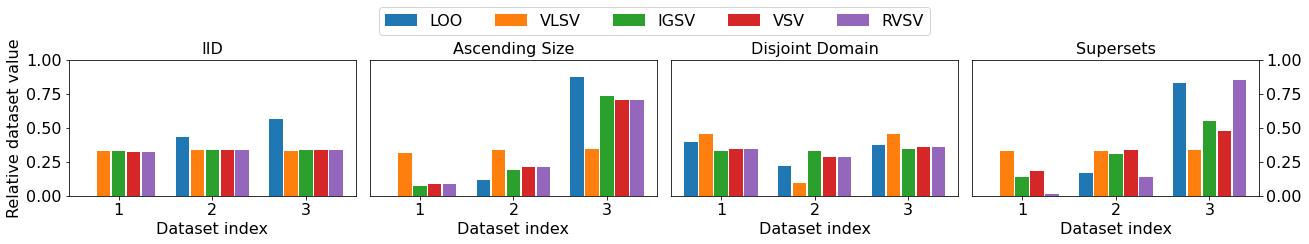

In [2]:
from matplotlib import pyplot as plt
import numpy as np

MAP = {'vol': 'Vol',
       'vol_sv': 'VSV',
       'vol_sv_robust': 'RVSV',
       'loo': 'LOO',
       'loss_sv': 'VLSV',
       'ig_sv': 'IGSV',
#        'spgp_ig_sv': 'S_IGSV',
      }

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, ylabel=True, title=''):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        
    hatches = ['---', '///', '\\\\\\', 'O+', '', 'xxx', 'oo', '**', 'O', '...']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2 + 1

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width,
                         color=colors[i % len(colors)], label=MAP[name] if x == 0 and legend else '')
            
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
        
    # Xticks
    ax.set_xticks(np.arange(1, len(list(data.values())[0])+1))
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Dataset index', fontsize=16)
    if ylabel:
        ax.set_ylabel('Relative dataset value', fontsize=16)
    ax.set_title(title, fontsize=16)

#     # Draw legend if we need
#     if legend:
# #         ax.legend(bars, data.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), ncol=7, fontsize=10)
#         ax.legend(bars, [MAP[key] for key in data.keys()], loc='best', fontsize=11, ncol=2)
    

paths = ['../outputs/res_hartmann_6D_3M.npz', 
         '../outputs/res_hartmann_6D_3M_size.npz',
         '../outputs/res_hartmann_6D_3M_disjoint.npz',
         '../outputs/res_hartmann_6D_3M_superset.npz'
        ]
titles = ['IID', 'Ascending Size', 'Disjoint Domain', 'Supersets']
cols = ['loo', 'loss_sv', 'ig_sv', 'vol_sv', 'vol_sv_robust']
n_plots = 4

fig, axs = plt.subplots(1, n_plots, figsize=(4.5*n_plots, 3))

for i, path in enumerate(paths):
    res = np.load(path, allow_pickle=True)
    res = res['res'][()] 
    data = {}
    for key in cols:
        data[key] = res[key]
    data = calculate_relative(data)
    ax = axs[i]
    if i == 0:
        bar_plot(ax, data, total_width=.8, single_width=.9, title=titles[i])
    elif i == (len(paths)-1):
        bar_plot(ax, data, total_width=.8, single_width=.9, legend=False, ylabel=False, title=titles[i])
        ax.yaxis.tick_right()
    else:
        bar_plot(ax, data, total_width=.8, single_width=.9, legend=False, ylabel=False, title=titles[i])
        ax.set_yticks([])
    ax.set_ylim(0,1)

leg = fig.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), fontsize=16, ncol=7)
                               
plt.tight_layout()
# plt.savefig('../outputs/figs/synthetic_baselines.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi=300)
plt.show()

###  Overlap of Input Domains (Fig. 13)

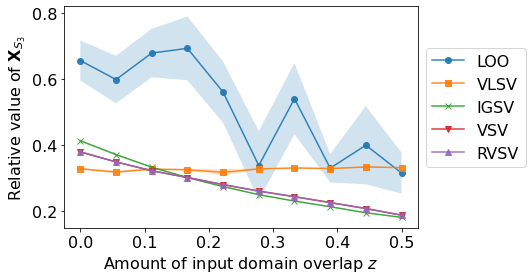

In [3]:
from scipy import stats
plt.rcParams["figure.figsize"] = (9/1.2,6/1.5)
MAP = {'vol': 'Vol',
       'vol_sv': 'VSV',
       'vol_sv_robust': 'RVSV',
       'robust_vol': 'RV',
       'loo': 'LOO',
       'loss_sv': 'VLSV',
       'ig_sv': 'IGSV',
       'spgp_ig_sv': 'S_IGSV',
      }

markers = ['o', 's', 'x', 'v', '^', '*']
methods = ['loo', 'loss_sv', 'ig_sv','vol_sv', 'vol_sv_robust']

res = np.load('../outputs/overlap_exp.npz', allow_pickle=True)['res'][()]

for i, method in enumerate(methods):
    curr_val = np.array(res[method])
    mean = np.mean(curr_val[:,:,2], axis=0)
    se = stats.sem(curr_val[:,:,2], axis=0)
    x = np.linspace(0, 0.5, 10)
    plt.plot(x, mean, label=MAP[method], linestyle='-', marker=markers[i], alpha=0.9)
    plt.fill_between(x, mean-se, mean+se, alpha=0.2)

plt.xlabel('Amount of input domain overlap $z$', fontsize=16)
plt.ylabel('Relative value of $\mathbf{X}_{S_3}$', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1, 0.85), fontsize=16)
# plt.legend()

plt.tight_layout()
# plt.savefig('../outputs/figs/overlap_exp.png', bbox_inches='tight', dpi=300)
plt.show()

###  Selection of the Discretization Coefficient (Fig. 11)

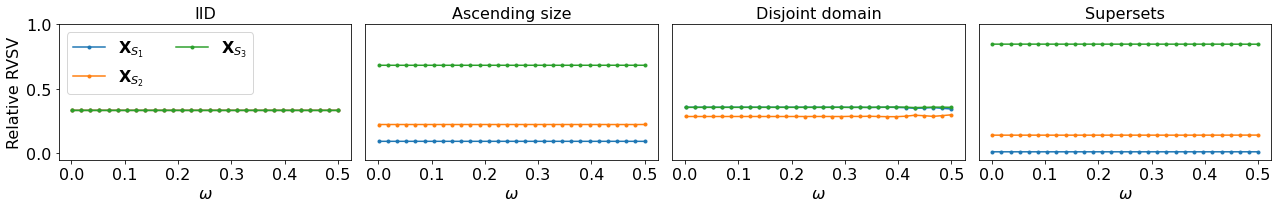

In [4]:
paths = ['../outputs/omega_exp_iid_normal_0.5.npz',
         '../outputs/omega_exp_size_normal_0.5.npz',
         '../outputs/omega_exp_disjoint_normal_0.5.npz',
         '../outputs/omega_exp_superset_normal_0.5.npz',
        ]

omegas = [np.linspace(0.001,0.5,30),
          np.linspace(0.001,0.5,30),
          np.linspace(0.001,0.5,30),
          np.linspace(0.001,0.5,30),
         ]

titles = ['IID', 'Ascending size', 'Disjoint domain', 'Supersets']
n_plots = len(paths)
# plt.rcParams["figure.figsize"] = (3.5*n_plots,3)

fig, axs = plt.subplots(1, n_plots, figsize=(4.5*n_plots, 3))

for i, path in enumerate(paths):
    res = np.load(path, allow_pickle=True)
    omega_res_rvsvs = res['omega_res_rvsvs']
    omega = omegas[i]
    ax = axs[i]
    for j in range(3):
        values = omega_res_rvsvs[:,:,j]
        mean = np.mean(values, axis=0)
        se = stats.sem(values, axis=0)
        if i == 0:
            ax.plot(omega, mean, marker='.', label='$\mathbf{X}_{S_' + str(j+1) + '}$')
            ax.legend(fontsize=16, loc='upper left', ncol=2)
        else:
            ax.plot(omega, mean, marker='.')
        ax.fill_between(omega, mean-se, mean+se, alpha=0.2)
    ax.tick_params(labelsize=16)
    ax.set_xlabel('$\omega$', fontsize=16)
    if i == 0:
        ax.set_ylabel('Relative RVSV', fontsize=16)
    else:
        ax.set_yticks([])
    ax.set_title(titles[i], fontsize=16)
    ax.set_ylim(-0.05, 1)

plt.tight_layout()
# plt.savefig('../outputs/figs/omega_exp_all.png', bbox_inches='tight', dpi=300)
plt.show()

### The Effect of the Value on the Emptyset for SV (Fig. 4)

1.0610506462328362 0.39425682616844004


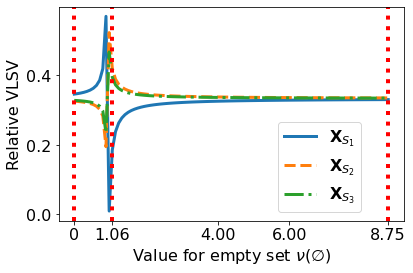

In [5]:
file = np.load('../outputs/sv_init_exp.npz')
res = file['res']
init_range = file['init_range']

n_plots = 1
plt.rcParams["figure.figsize"] = (4.5*n_plots*1.3,3*1.3)

linestyles = ['-', '--', '-.']

for i in range(3):
    values = res[:,i]
    plt.plot(init_range, values, linestyle=linestyles[i], label='$\mathbf{X}_{S_' + str(i+1) + '}$', linewidth=3)
print(init_range[12], values[12])

plt.tick_params(labelsize=16)

plt.xticks([0, 1.06, 4, 6, init_range[-1].round(2)], ['0', '1.06', '4.00', '6.00', '8.75'])
plt.xlabel(r'Value for empty set $\nu(\emptyset)$', fontsize=16)
plt.ylabel('Relative VLSV', fontsize=16)

plt.axvline(x=0, color='red', linestyle='dotted', linewidth=4)
plt.axvline(x=8.75, color='red', linestyle='dotted', linewidth=4)
plt.axvline(x=1.06, color='red', linestyle='dotted', linewidth=4)

## Zero [0.34610042, 0.32585142, 0.32804816],  [0.346, 0.326, 0.328]
## Zero initialization value [0.18303779, 0.4214113 , 0.39555092], [0.18303779, 0.4214113 , 0.39555092]
## random initalization value [0.33029488, 0.33511397, 0.33459115]

plt.legend(bbox_to_anchor=(0.9, 0.5), fontsize=16)
plt.tight_layout()
# plt.savefig('../outputs/figs/sv_init_exp.png', bbox_inches='tight', dpi=300)
plt.show()

### Experiment on the Different Preferences on Validation Sets (Fig. 5)

----------Relative Value----------
loo :  [0.22092859 0.23106995 0.54800146]
loss_sv :  [0.32995    0.33452494 0.33552506]
ig_sv :  [0.40227953 0.25523928 0.34248117]
spgp_ig_sv :  [0.4022795 0.2552393 0.3424812]
vol :  [0.49643678 0.16712388 0.33643934]
vol_sv :  [0.40065396 0.25994092 0.3394051 ]
vol_sv_robust :  [0.4132805  0.25298685 0.33373272]
----------Relative Value----------
loo :  [0.58895568 0.08994524 0.32109907]
loss_sv :  [0.31774646 0.34662174 0.3356318 ]
ig_sv :  [0.40227953 0.25523928 0.34248117]
spgp_ig_sv :  [0.4022795 0.2552393 0.3424812]
vol :  [0.49643678 0.16712388 0.33643934]
vol_sv :  [0.40065396 0.25994092 0.3394051 ]
vol_sv_robust :  [0.4132805  0.25298685 0.33373272]
----------Relative Value----------
loo :  [0.96981446 0.03018554 0.        ]
loss_sv :  [0.34499912 0.32781722 0.32718366]
ig_sv :  [0.3224541  0.3241498  0.35339612]
vol :  [0.11161558 0.29924529 0.58913913]
vol_sv :  [0.27740037 0.35599568 0.3666039 ]
vol_sv_robust :  [0.2774014  0.35599533 0.

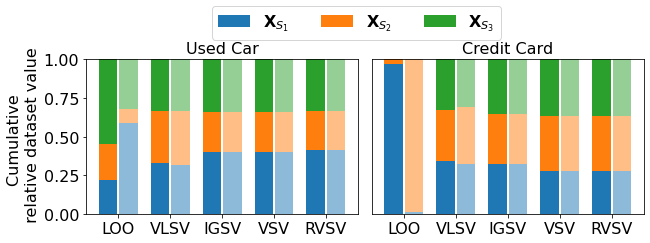

In [6]:
def stacked_bar_plot_diff(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, ylabel=True):

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        
    hatches = ['---', '///', '\\\\\\', 'O+', '', 'xxx', 'oo', '**', 'O', '...']
    
    # The width of a single bar
    n_bars = 2
    total_width = 0.8
    bar_width = total_width / 2
    
    keys = list(data[0].keys())
    bars = []
    
    for i, curr_data in enumerate(data):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        prev = np.zeros(len(keys))
        for j in range(len(curr_data[keys[0]])):
            curr = []
            for key in keys:
                curr.append(curr_data[key][j])
            bar = ax.bar(np.arange(len(keys)) + x_offset, curr, bottom=prev, width=0.35, 
                         color=colors[j], label='$\mathbf{X}_{S_' + str(j+1) + '}$' if i == 0 and legend else '', alpha=1 if i==0 else 0.5)
            if i == 0:
                bars.append(bar)
            prev += np.array(curr)
    
    # Xticks
    ax.set_xticks(np.arange(len(keys)))
    ax.tick_params(labelsize=16)
    ax.set_xticklabels([MAP[key] for key in keys], fontsize=16)
    ax.set_ylim(0,1)
    if ylabel:
        ax.set_ylabel('Cumulative \n relative dataset value', fontsize=16)
    else:
        ax.set_yticks([])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

data1 = np.load('../outputs/res_used_car_5D_3M.npz', allow_pickle=True)['res'][()]
data2 = np.load('../outputs/res_used_car_5D_3M_train_test_diff_distri.npz', allow_pickle=True)['res'][()] 
data1 = calculate_relative(data1)
data2 = calculate_relative(data2)
keep = ['loo', 'loss_sv', 'ig_sv', 'vol_sv', 'vol_sv_robust']
data1 = {k: v for k, v in data1.items() if k in keep}
data2 = {k: v for k, v in data2.items() if k in keep}

stacked_bar_plot_diff(ax1, [data1, data2], total_width=.8, single_width=.9)
ax1.set_title('Used Car', fontsize=16)
                               
data1 = np.load('../outputs/res_credit_card_8D_3M.npz', allow_pickle=True)['res'][()]
data2 = np.load('../outputs/res_credit_card_8D_3M_train_test_diff_distri.npz', allow_pickle=True)['res'][()] 
data1 = calculate_relative(data1)
data2 = calculate_relative(data2)
keep = ['loo', 'loss_sv', 'ig_sv', 'vol_sv', 'vol_sv_robust']
data1 = {k: v for k, v in data1.items() if k in keep}
data2 = {k: v for k, v in data2.items() if k in keep}

stacked_bar_plot_diff(ax2, [data1, data2], total_width=.8, single_width=.9, legend=False, ylabel=False)
ax2.set_title('Credit Card', fontsize=16)

leg = fig.legend(loc='upper center', bbox_to_anchor=(0.54,1.15), fontsize=16, ncol=4)

                               
plt.tight_layout()
# plt.savefig('../outputs/figs/hold_out_test.png', bbox_extra_artists=(leg,), bbox_inches='tight', dpi=300)
plt.show()

### Replication Robustness om IID Setting (Fig. 6)

----------Relative Value----------
loo :  [0.71757105 0.28242895 0.        ]
loss_sv :  [0.33745446 0.33303804 0.3295075 ]
ig_sv :  [0.34784454 0.33507973 0.31707573]
vol :  [0.44475793 0.24557207 0.30967   ]
vol_sv :  [0.34073207 0.32976034 0.3295076 ]
vol_sv_robust :  [0.34073177 0.32976052 0.32950774]
----------Relative Value----------
loo :  [0.4945491 0.5054509 0.       ]
loss_sv :  [0.33636079 0.33517185 0.32846736]
ig_sv :  [0.26675054 0.31376487 0.4194846 ]
vol :  [1.63489634e-04 1.52565797e-03 9.98310852e-01]
vol_sv :  [0.13956803 0.26012784 0.6003042 ]
vol_sv_robust :  [0.3434173  0.33203468 0.324548  ]


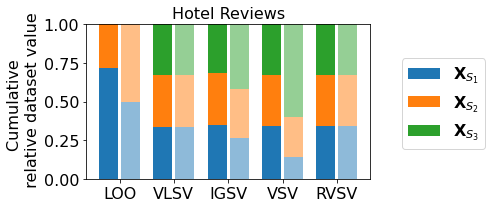

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(5.2,3))

data1 = np.load('../outputs/res_hotel_reviews_8D_3M.npz', allow_pickle=True)['res'][()]
data2 = np.load('../outputs/res_hotel_reviews_8D_3M_rep.npz', allow_pickle=True)['res'][()] 
data1 = calculate_relative(data1)
data2 = calculate_relative(data2)
keep = ['loo', 'loss_sv', 'ig_sv', 'vol_sv', 'vol_sv_robust']
data1 = {k: v for k, v in data1.items() if k in keep}
data2 = {k: v for k, v in data2.items() if k in keep}

stacked_bar_plot_diff(ax1, [data1, data2], total_width=.8, single_width=.9, legend=True, ylabel=True)
ax1.set_title('Hotel Reviews', fontsize=16)

leg = fig.legend(loc='center right', bbox_to_anchor=(1.3,0.5), fontsize=16, ncol=1)
                               
plt.tight_layout()
# plt.savefig('../outputs/figs/rep_hotel.png', bbox_inches='tight', dpi=300)
plt.show()

### Simulation for Replication Experiments on Volume and RV (Fig. 10)

Configs: function=friedman, D=6, M=3, train_sizes=[200 200 200], test_sizes=[200 200 200], seed=1234


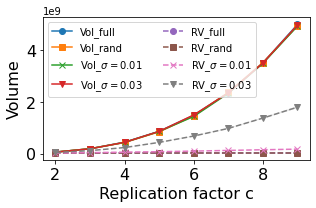

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(4.5,3))

res = np.load('../outputs/replication_friedman_6D_3M_10runs.npz')
vols, rob_vols = res['vols'], res['rob_vols']
print('Configs: function={}, D={}, M={}, train_sizes={}, test_sizes={}, seed={}'.\
      format(res['function'], res['D'], res['M'], res['train_sizes'], res['test_sizes'], res['seed']))

x = list(range(2,10))
markers = ['o', 's', 'x', 'v', '^', '.', '*', '1', '2', '3', '4']
linestyles = ['-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
vol_labels = ['Vol_full', 'Vol_rand', 'Vol_$\sigma=0.01$', 'Vol_$\sigma=0.03$']
rob_labels = ['RV_full', 'RV_rand', 'RV_$\sigma=0.01$', 'RV_$\sigma=0.03$']

for i in range(4):
    values = vols[:,:,i]
    mean = np.mean(values, axis=1)
    se = stats.sem(values, axis=1)
    ax1.plot(x, mean, label=vol_labels[i], marker=markers[i])
    ax1.fill_between(x, mean - se, mean + se, alpha=0.2)

for i in range(4):
    values = rob_vols[:,:,i]
    mean = np.mean(values, axis=1)
    se = stats.sem(values, axis=1)
    ax1.plot(x, mean, label=rob_labels[i], marker=markers[i], linestyle='--')
    ax1.fill_between(x, mean - se, mean + se, alpha=0.2)

ax1.tick_params(labelsize=16)
ax1.legend(ncol=2, fontsize=10)
ax1.set_xlabel('Replication factor c', fontsize=16)
ax1.set_ylabel('Volume', fontsize=16)

# leg = fig.legend(loc='upper center', bbox_to_anchor=(0.54,1.15), fontsize=16, ncol=4)
                               
plt.tight_layout()
# plt.savefig('../outputs/figs/replication.png', bbox_inches='tight', dpi=300)
plt.show()

###  Robust Volume and Learning Performance (Credit Card, Uber Lyft) (Fig. 2)

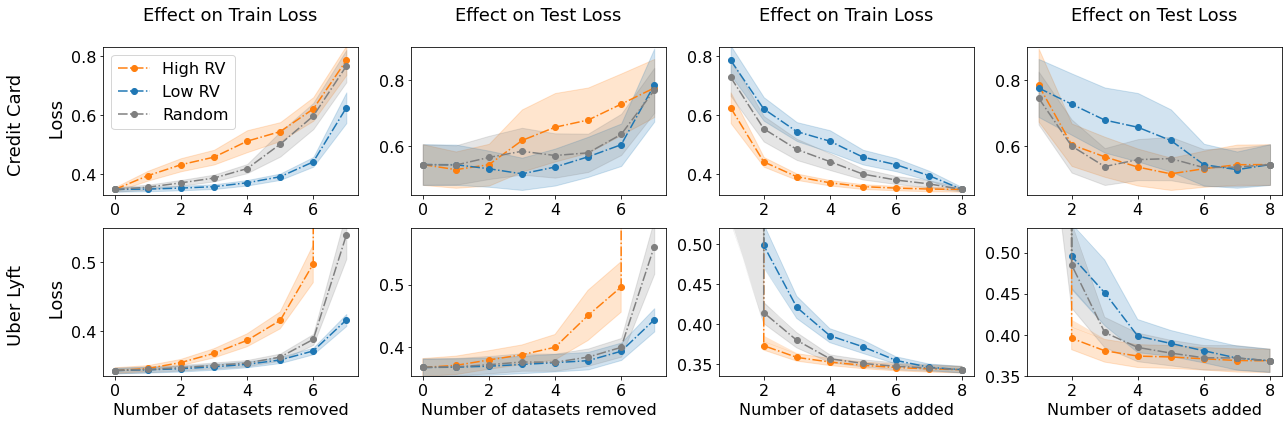

In [9]:
datasets = ['credit_card', 'uber_lyft']
titles = ['Credit Card', 'Uber Lyft']
exp_types = ['remove', 'add']
loss_types = ['train', 'test']

colors = ['C1', 'C6', 'C2', 'C9', 'C10', 'C3', 'C4', 'C7', 'C8', 'C5']
markers = ['.', 'o', 'x', 'v', '^', '*', '1', '2', '3', '4']

fig, axs = plt.subplots(2, 4, figsize=(18,6))

ylims = [(0.33,0.83),(0.45,0.9),(0.33,0.83),(0.45,0.9),(0.335,0.55),(0.355,0.59),(0.335,0.52),(0.35,0.53)]

for a, dataset in enumerate(datasets):
    for b, exp_type in enumerate(exp_types):
        res = np.load('../outputs/{}_valuable_{}_8M.npz'.format(exp_type, dataset), allow_pickle=True)
        
        T = 8+1 if exp_type == 'add' else 7 + 1
        x = range(1, 9) if exp_type == 'add' else range(0, 8)
        
        for c, loss_type in enumerate(loss_types):
            
            high = res['high_' + loss_type]
            low = res['low_' + loss_type]
            rand = res['rand_' + loss_type]
            
            n = len(high)
            mean_h = np.mean(high, axis=0)
            mean_l = np.mean(low, axis=0)
            mean_r = np.mean(rand, axis=0)
            std_h = np.std(high, axis=0)
            std_l = np.std(low, axis=0)
            std_r = np.std(rand, axis=0)
            
            ax = axs[a][b*2+c]
            
            label_phrase = 'Add' if exp_type == 'add' else 'Remove'
            
            first_subplot = (a == 0 and b == 0 and c == 0)
            ax.plot(x, mean_h, marker=markers[1], color=colors[0], linestyle='-.', label='High RV')
            ax.plot(x, mean_l, marker=markers[1], color=colors[4], linestyle='-.', label='Low RV')
            ax.plot(x, mean_r, marker=markers[1], color=colors[7], linestyle='-.', label='Random')

            ax.fill_between(x, mean_h - std_h / np.sqrt(n-1), mean_h + std_h / np.sqrt(n-1), alpha=0.2, color=colors[0])
            ax.fill_between(x, mean_l - std_l / np.sqrt(n-1), mean_l + std_l / np.sqrt(n-1), alpha=0.2, color=colors[4])
            ax.fill_between(x, mean_r - std_r / np.sqrt(n-1), mean_r + std_r / np.sqrt(n-1), alpha=0.2, color=colors[7])
            
            if (dataset == 'credit_card' and exp_type == 'add') or (dataset == 'uber_lyft' and exp_type == 'remove'):
                upper_ylim = np.max(mean_l + std_l / np.sqrt(n-1))
            else:
                upper_ylim = np.max(mean_h + std_h / np.sqrt(n-1))
            
#             ax.set_ylim(np.min(mean_r - std_r / np.sqrt(n-1)), upper_ylim)
            ax.set_ylim(ylims[a*4+b*2+c])
            ax.tick_params(labelsize=16)
            
            
            if a == 0 and b == 0 and c == 0:
                ax.legend(loc='upper left', fontsize=16)
                ax.set_ylabel('{} \n\n Loss'.format(titles[a]), fontsize=18)
            if a == 1 and b == 0 and c == 0:
                ax.set_ylabel('{} \n\n Loss'.format(titles[a]), fontsize=18)
            if a == 0 and c == 0:
                ax.set_title('Effect on Train Loss\n', fontsize=18)
            if a == 0 and c == 1:
                ax.set_title('Effect on Test Loss\n', fontsize=18)
            if a == 1 and b == 0:
                ax.set_xlabel('Number of datasets removed', fontsize=16)
            if a == 1 and b == 1:
                ax.set_xlabel('Number of datasets added', fontsize=16)
          
plt.tight_layout()
# plt.savefig('../outputs/figs/add_remove.png', bbox_inches='tight', dpi=300)
plt.show()

###  Robust Volume and Learning Performance (Used Car, Hotel Reviews) (Fig. 12)

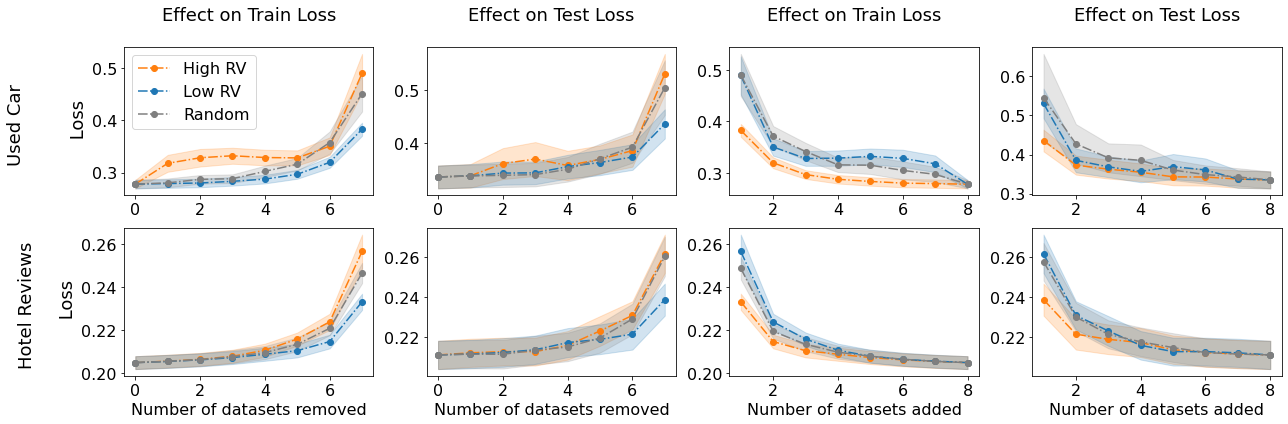

In [10]:
datasets = ['used_car', 'hotel_reviews']
titles = ['Used Car', 'Hotel Reviews']
exp_types = ['remove', 'add']
loss_types = ['train', 'test']

colors = ['C1', 'C6', 'C2', 'C9', 'C10', 'C3', 'C4', 'C7', 'C8', 'C5']
markers = ['.', 'o', 'x', 'v', '^', '*', '1', '2', '3', '4']

fig, axs = plt.subplots(2, 4, figsize=(18,6))

ylims = [(0.33,0.83),(0.45,0.9),(0.33,0.83),(0.45,0.9),(0.335,0.55),(0.355,0.59),(0.335,0.52),(0.35,0.53)]

for a, dataset in enumerate(datasets):
    for b, exp_type in enumerate(exp_types):
        res = np.load('../outputs/{}_valuable_{}_8M.npz'.format(exp_type, dataset), allow_pickle=True)
        
        T = 8+1 if exp_type == 'add' else 7 + 1
        x = range(1, 9) if exp_type == 'add' else range(0, 8)
        
        for c, loss_type in enumerate(loss_types):
            
            high = res['high_' + loss_type]
            low = res['low_' + loss_type]
            rand = res['rand_' + loss_type]
            
            n = len(high)
            mean_h = np.mean(high, axis=0)
            mean_l = np.mean(low, axis=0)
            mean_r = np.mean(rand, axis=0)
            std_h = np.std(high, axis=0)
            std_l = np.std(low, axis=0)
            std_r = np.std(rand, axis=0)
            
            ax = axs[a][b*2+c]
            
            label_phrase = 'Add' if exp_type == 'add' else 'Remove'
            
            first_subplot = (a == 0 and b == 0 and c == 0)
            ax.plot(x, mean_h, marker=markers[1], color=colors[0], linestyle='-.', label='High RV')
            ax.plot(x, mean_l, marker=markers[1], color=colors[4], linestyle='-.', label='Low RV')
            ax.plot(x, mean_r, marker=markers[1], color=colors[7], linestyle='-.', label='Random')

            ax.fill_between(x, mean_h - std_h / np.sqrt(n-1), mean_h + std_h / np.sqrt(n-1), alpha=0.2, color=colors[0])
            ax.fill_between(x, mean_l - std_l / np.sqrt(n-1), mean_l + std_l / np.sqrt(n-1), alpha=0.2, color=colors[4])
            ax.fill_between(x, mean_r - std_r / np.sqrt(n-1), mean_r + std_r / np.sqrt(n-1), alpha=0.2, color=colors[7])
            
            if (dataset == 'credit_card' and exp_type == 'add') or (dataset == 'uber_lyft' and exp_type == 'remove'):
                upper_ylim = np.max(mean_l + std_l / np.sqrt(n-1))
            else:
                upper_ylim = np.max(mean_h + std_h / np.sqrt(n-1))
            
#             ax.set_ylim(np.min(mean_r - std_r / np.sqrt(n-1)), upper_ylim)
#             ax.set_ylim(ylims[a*4+b*2+c])
            ax.tick_params(labelsize=16)
            
            
            if a == 0 and b == 0 and c == 0:
                ax.legend(loc='upper left', fontsize=16)
                ax.set_ylabel('{} \n\n\n Loss'.format(titles[a]), fontsize=18)
            if a == 1 and b == 0 and c == 0:
                ax.set_ylabel('{} \n\n Loss'.format(titles[a]), fontsize=18)
            if a == 0 and c == 0:
                ax.set_title('Effect on Train Loss\n', fontsize=18)
            if a == 0 and c == 1:
                ax.set_title('Effect on Test Loss\n', fontsize=18)
            if a == 1 and b == 0:
                ax.set_xlabel('Number of datasets removed', fontsize=16)
            if a == 1 and b == 1:
                ax.set_xlabel('Number of datasets added', fontsize=16)
          
plt.tight_layout()
# plt.savefig('../outputs/figs/add_remove_car_hotel.png', bbox_inches='tight', dpi=300)
plt.show()